# Installing required packages

In [1]:
!pip install vaderSentiment

In [2]:
!pip install wordcloud

In [3]:
!pip install lightgbm

In [4]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


# Loading required libraries

In [5]:
# Statistical packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# Text
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS

#ML model
from lightgbm import LGBMRegressor,LGBMClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error,f1_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

#Preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

# Over sampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import NearMiss

In [6]:
plt.rc('figure',figsize=(8,7.5))

np.random.seed(2021)

# Exploring Data

In this section, we will be exploring our data and visualizing key features to makes sense of consumer engagement.

# Loading Data

After initial review of the data set contains 10437 records and 14 columns.

We will be focusing on:

In [9]:
# Load data from the csv file

df=pd.read_csv('C:/Users/piyus/Downloads/data_article.csv')
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 10437
Number of columns/variables: 15


,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


# Missing Values

Using .isna().sum() we can check each column with missing values. To make it fancy we have converted our finding into a table with NA percent and color gradient background. As we can observe the majority of content and autor name columns have missing values.

In [10]:
#Missing Values

NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
            for i in (df.isna().sum()/df.shape[0]*100).tolist()]], 
            columns=df.columns, index=['NA Count', 'NA Percent']).T.\
            sort_values(by='NA Count',ascending =False)
NA.style.background_gradient(cmap="summer", subset=['NA Count'])

,NA Count,NA Percent
content,1292,12.38%
author,1020,9.77%
url_to_image,656,6.29%
engagement_reaction_count,118,1.13%
engagement_comment_count,118,1.13%
engagement_share_count,118,1.13%
engagement_comment_plugin_count,118,1.13%
description,24,0.23%
title,2,0.02%
top_article,2,0.02%


# Top Ten Author and Source Name

Using seaborn bar plot we have displayed the top 10 authors and source names. We can see that some of the author’s names are similar to publication/sources. The top three leader sources are Reuters, BBC News, and Irish Times. The top three authors are The Associated Press, Reuters, and CBS News.

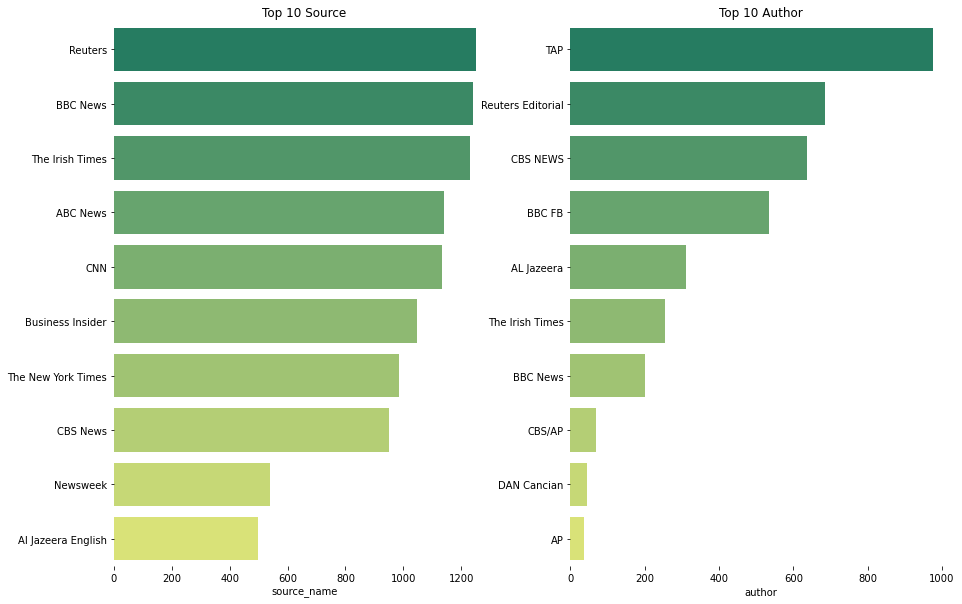

In [11]:
#Top Ten Author and Source Name
#Using seaborn bar plot we have displayed the top 10 authors and source names.

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
source_name = df["source_name"].dropna().value_counts()[:10]
author = df["author"].dropna().value_counts()[:10]

yticklabels = ['TAP',
               'Reuters Editorial',
               'CBS NEWS',
               'BBC FB',
               'AL Jazeera',
               'The Irish Times',
               'BBC News',
               'CBS/AP',
               'DAN Cancian', 
               'AP']
sns.barplot(x=source_name,y=source_name.index,palette='summer',ax=ax1)
sns.barplot(x=author,y=author.index,palette='summer',ax=ax2 )
sns.despine(bottom=True,left=True)
ax1.set(title='Top 10 Source')
ax2.set(title='Top 10 Author')
ax2.set_yticklabels(yticklabels) ;

# Top Article

Using matplotlib pie chart, we can see the there are on 12 percentage of top articles.

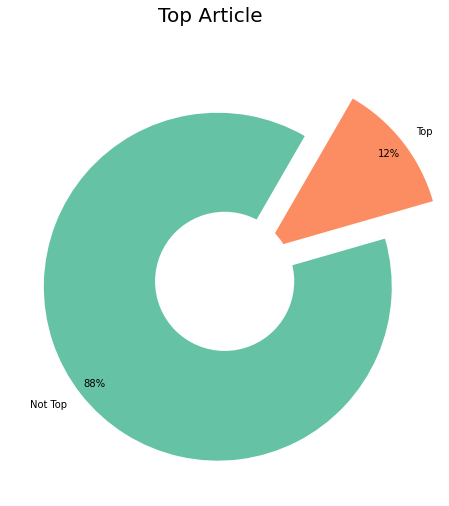

In [12]:
#Top Article
#Using matplotlib pie chart, we can see the there are on 12 percentage of top articles.

fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Top Article', size = 20, color = "black")
explode = ( 0.05, 0.3)
labels = ["Not Top","Top"]
sizes = df["top_article"].dropna().value_counts()
ax.pie(sizes, 
       explode=explode, 
       colors=sns.color_palette("Set2"),
       startangle=60,
       labels=labels,
       autopct='%1.0f%%',
       pctdistance=0.9)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()


# Engagement Boxplots

It was pretty hard to analyze the distribution of engagement data, as they have extreme outliners. We can use sns.kdeplot and np.log1p to analyze each engagement column, but there is a better way that is to use boxplot with yscale set to Symlog.

* Engagement Reaction count has 1 medium but it has multiple outliners with mean values between 0–60.

* Engagement Comments count has 0 medium but it has multiple outliners with mean values between 0–1.

* Engagement Share count has 10 medium but it has multiple outliners with mean values between 0–50.

* Engagement Comments Plugin count has 0 medium but it has multiple outliners with a mean value is 0.

C:\Users\piyus\AppData\Local\Temp\ipykernel_1516\3898697746.py:8: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  ax.set_yscale('Symlog')


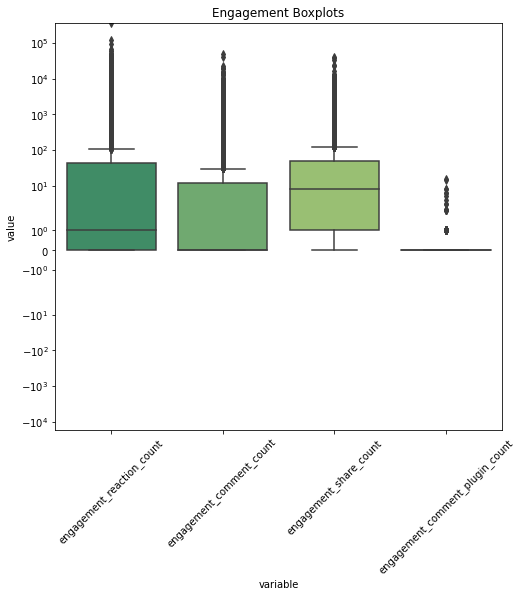

In [15]:


eng = ['engagement_reaction_count',
       'engagement_comment_count',
       'engagement_share_count',
       'engagement_comment_plugin_count'] 
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df[eng]),palette='summer')
ax.set_title('Engagement Boxplots')
plt.xticks(rotation=45)
ax.set_yscale('Symlog')
plt.show()


# Comment Plugin

Let’s check out the comment plugin in as it has the oddest data with 0 mean and 0 median. As we can see 99 percent of data is ZERO and the rest of them are outliners from 1–15.

In [14]:


pd.DataFrame(df["engagement_comment_plugin_count"].\
             value_counts().\
             reset_index().\
             rename(columns = {'index':'engagement_comment_plugin',
                               'engagement_comment_plugin_count':'Counts'})).\
            astype(int).\
            style.background_gradient(cmap="summer", subset=['Counts'])

,engagement_comment_plugin,Counts
0,0,10269
1,1,32
2,2,8
3,3,2
4,8,2
5,6,2
6,15,1
7,5,1
8,4,1
9,14,1


# Clean title

Let’s clean our title as we will be using it in our machine learning model. There are punctuation marks and capitalized words within our text data that will make our model perform worst.

In [16]:


df['title'][0:5]


0    NTSB says Autopilot engaged in 2018 California...
1         Unemployment falls to post-crash low of 5.2%
2    Louise Kennedy AW2019: Long coats, sparkling t...
3    North Korean footballer Han joins Italian gian...
4    UK government lawyer says proroguing parliamen...
Name: title, dtype: object

clean_title function will clean for brackets, hyperlinks, punctuation, and words containing numbers.

In [17]:
#clean_title function will clean for brackets, hyperlinks, punctuation, and words containing numbers.

def clean_title(x:str):    
    # lowering the text
    x=x.lower() 
 
    #removing square brackets
    x = re.sub('\[.*?\]', '', x)
    x = re.sub('<.*?>+', '', x) 

    #removing hyperlink
    x = re.sub('https?://\S+|www\.\S+', '', x) 

    #removing puncuation
    x = re.sub('[%s]' % re.escape(string.punctuation), '', x) 
    x = re.sub('\n', '', x) 

    #remove words containing numbers
    x = re.sub('\w*\d\w*', '', x) 
    return x

Adding new columns containing clean titles

In [18]:
#Adding new columns containing clean titles

df['clean_title'] = df['title'].astype(str).apply(clean_title) 
df['clean_title'][0:5]


0    ntsb says autopilot engaged in  california tes...
1              unemployment falls to postcrash low of 
2    louise kennedy  long coats sparkling tweed dre...
3    north korean footballer han joins italian gian...
4    uk government lawyer says proroguing parliamen...
Name: clean_title, dtype: object

# Creating sentimental polarity

Using Vader Sentiment Intensity Analyzer we are going to extract scores from the clean title and dividing them into 3 categories Positive, Negative, and Neutral.

In [19]:

analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

# Applying Compound score


In [20]:


polarity_scores = df["clean_title"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

# Applying Sentiment

In [22]:
#Applying Sentiment

df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)   

In [23]:
#As we can see we have added 2 columns in our dataset with sentiment score 
#and emotions based on score.

df.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,clean_title,Sentiment_Score,Sentiment
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0,ntsb says autopilot engaged in california tes...,0.0000,Neutral
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0,unemployment falls to postcrash low of,-0.6124,Negative
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN,louise kennedy long coats sparkling tweed dre...,0.2960,Neutral
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0,north korean footballer han joins italian gian...,0.0000,Neutral
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0,uk government lawyer says proroguing parliamen...,-0.0951,Neutral


# Countplot on sentiment categories

The News title has mostly neutral sentiments and negative emotions to see the news.

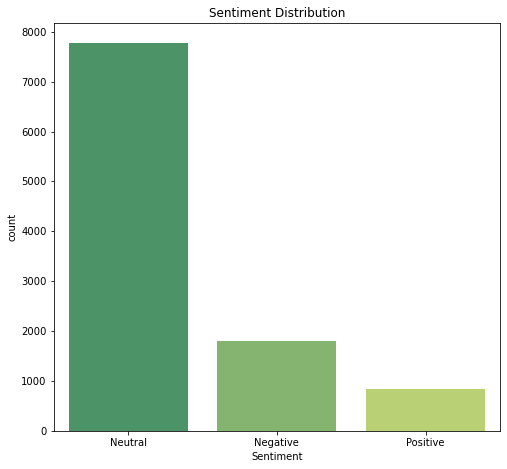

In [24]:


sns.countplot(data=df,x="Sentiment",palette="summer")
plt.title('Sentiment Distribution');

# Word Cloud

We will use the word cloud library to display the most common word used in both Title and Description.



In [25]:
#Word Cloud
#We will use the word cloud library to display the most common word used in both Title and Description.

np.array(list(STOPWORDS))[0:5]

array(["you've", 'from', 'by', 'having', 'there'], dtype='<U10')

Most common words are say, new, said, will and Trump. We have used English stopwords to remove common words present in every sentence.



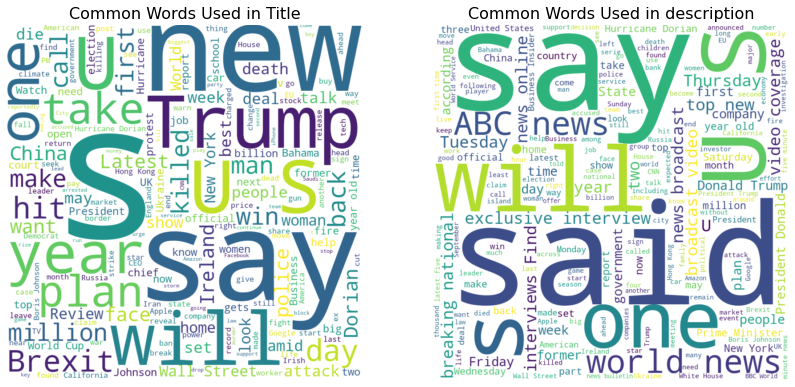

In [54]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[14, 14], facecolor = None)


wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,stopwords = STOPWORDS)
wc.generate("".join(df['title'].astype(str)))
ax1.axis("off")
ax1.imshow(wc, interpolation="bilinear")
ax1.set_title('Common Words Used in Title',fontsize=16);


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True,stopwords = STOPWORDS)
wc2.generate("".join(df['description'].astype(str)))
ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Common Words Used in description',fontsize=16);

# Time series

In [27]:
#Spliting Date Time
#We will be spliting date into day of week, month, and year, then adding them into dataframe.

df['published_at'] = pd.to_datetime(df['published_at'])

df['Day_Of_Week'] = df['published_at'].apply(lambda x: x.dayofweek)
df['Month'] = df['published_at'].apply(lambda x: x.month)
df['Year'] = df['published_at'].apply(lambda x: x.year)


# Number of Engagement over month

Using seaborn line plot to display consumer engagement pattern over the month. There is a spike in consumer engagement on 1st October. Maybe it’s due to a major event. Other than that there are smaller peaks in reaction engagements on 3rd, 7th, and 12th September.

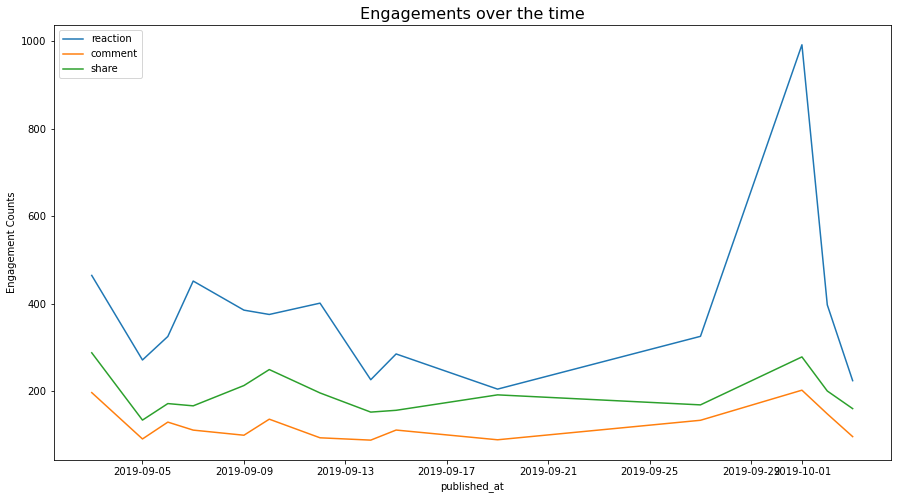

In [28]:

fig, ax1 = plt.subplots( figsize=[15, 8], facecolor = None)

date_mean = df.copy()
date_mean['published_at'] = pd.to_datetime(date_mean['published_at']).dt.normalize()
date_mean = date_mean.groupby(by='published_at').mean().reset_index()

ax1 = sns.lineplot(
    data=date_mean, x="published_at", y="engagement_reaction_count",label = 'reaction'
)

ax1 = sns.lineplot(
    data=date_mean, x="published_at", y="engagement_comment_count",label = 'comment'
)

ax1 = sns.lineplot(
    data=date_mean, x="published_at", y="engagement_share_count", label = 'share'
)
plt.ylabel('Engagement Counts')
plt.title('Engagements over the time',fontsize=16);

# Coorelation Heatmap

There is a high positive correlation between reaction, comment, and share engagement. The consumer who likes the post is most likely to share and comment. There is no other significant correlation between engagements and top articles, this is evident that selection of top article is purely based on quality.

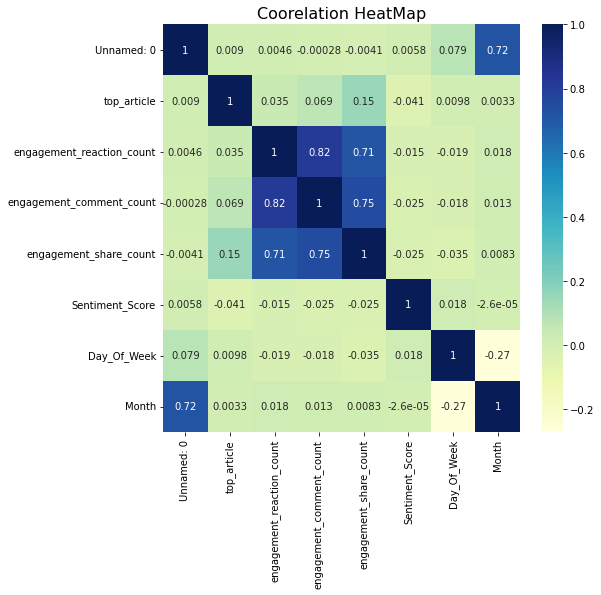

In [29]:


dataplot = sns.heatmap(df.drop(columns = ['Year','engagement_comment_plugin_count']).corr(),
                       cmap="YlGnBu", annot=True)
dataplot.set_title('Coorelation HeatMap',fontsize=16)  
# displaying heatmap
plt.show()



In [30]:
#Tfidf Vectorizer
#Our machine learning models understand only numerical values so in order to train our model on text data 
#we will convert it to a matrix of TF-IDF features.

df['clean_title'].fillna('Missing',inplace=True)

tfidf_vec = TfidfVectorizer(ngram_range=(1,2),
                            dtype=np.float32, 
                            sublinear_tf=True, 
                            use_idf=True, 
                            smooth_idf=True)
train_tfidf = tfidf_vec.fit_transform(df['clean_title'])

In [31]:
#Oversampling
#Our top_article data is unbalanced as we only have 12 percent of 1's. 

list_labels = df["top_article"].fillna(0)
list_labels.value_counts()

0.0    9163
1.0    1274
Name: top_article, dtype: int64

In [32]:
#In order to make our model perform better, we will be using oversampling method SMOTE 
#(Synthetic Minority Over-sampling Technique).

OS = SMOTE()
X,Y = OS.fit_resample(train_tfidf,list_labels)

In [33]:
#Popularity Score
#We will be adding all fours engagement columns and then taking np.log1p(X) which is similar to np.log(X+1).
#Many zero engagements will result in infinity so adding 1 to all columns will avoid disaster.

df['Popularity_Score'] = np.log1p((df['engagement_reaction_count'] + \
                         df['engagement_comment_count']+\
                         df['engagement_share_count']+\
                         df['engagement_comment_plugin_count']))

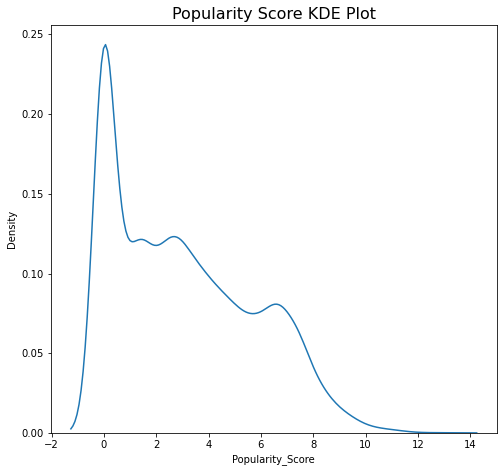

In [34]:
#We can clearly see the majority of distribution is between 0–3.

sns.kdeplot(df['Popularity_Score'])
plt.title('Popularity Score KDE Plot',fontsize=16);

In [35]:
#We can clearly see the top 2 popular publishing companies are The New York Times and CNN.

df.groupby(by='source_name').\
    mean()['Popularity_Score'].\
    to_frame().\
    sort_values(by='Popularity_Score',
                ascending=False)

,Popularity_Score
source_name,
The New York Times,4.777518
CNN,4.418373
Business Insider,3.855361
Al Jazeera English,3.720652
The Wall Street Journal,3.499767
CBS News,3.163584
BBC News,2.929104
Newsweek,2.674136
Reuters,2.673019


In [ ]:
#Test Classifier Model
#Let’s build a model that will take titles and predict whether the article will be become top or not.

#X : title
#y : top_article

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.1,
                                                    stratify = Y ,
                                                    random_state=40)

modeltop = LGBMClassifier(verbose=-1,
                          learning_rate=0.5,
                          max_depth=20,
                          num_leaves=50, 
                          n_estimators=120,
                          max_bin=2000,)

In [37]:
#Cross Validation
#After cross-validation of our model, we can observe that our f1 score is quite stable. 0.9 is the best we could achieve.
scores = cross_val_score(
                 modeltop, X_train, y_train, cv=5, scoring='f1_macro')

print("Cross Validation F1 Scores : ",scores)

Cross Validation F1 Scores :  [0.90601464 0.90508244 0.90231021 0.89712144 0.90382022]


In [38]:
#Train/Test Model
#After fitting our model on the training dataset we can see both f1 and accuracy_scores are +0.9 on our test dataset.

modeltop.fit(X_train,y_train)

predtop = modeltop.predict(X_test)
print("f1 score : ",round(f1_score(predtop,y_test),2))
print("accuracy score : ",round(accuracy_score(predtop,y_test),2))

f1 score :  0.9
accuracy score :  0.9


In [39]:
#save model

joblib.dump(modeltop, 'lgb_top.pkl')

['lgb_top.pkl']

In [40]:
#Confusion Matrix
#We have a few false positives and false negatives. In general, our LGBM model performed better the expected.


y_test.value_counts()

0.0    917
1.0    916
Name: top_article, dtype: int64

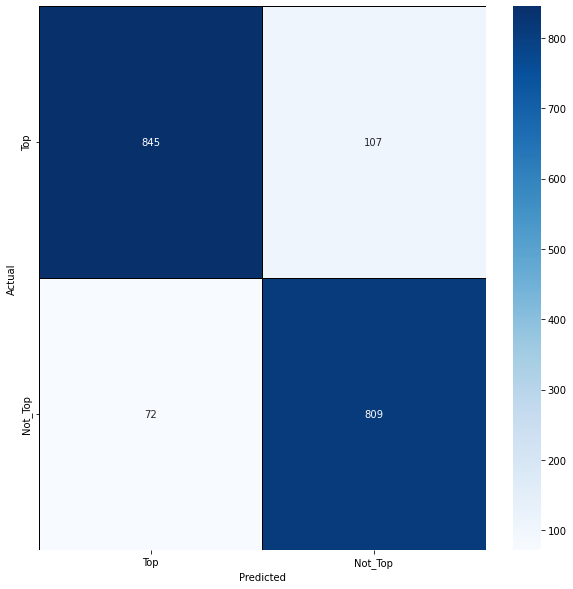

In [41]:
plt.figure(figsize = (10,10))
cm = confusion_matrix(predtop, y_test)
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black' ,
            linewidth = 1 ,
            annot = True,
            fmt='' ,
            xticklabels = ['Top','Not_Top'] ,
            yticklabels = ['Top','Not_Top'])
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [ ]:
#Text Regression Model
#X : title
#y : Popularity_score

In [42]:
#Train Test Split

list_labels = df["Popularity_Score"].fillna(1)

X_train, X_test, y_train, y_test = train_test_split(train_tfidf,
                                                    list_labels,
                                                    test_size=0.2,
                                                    random_state=40)

In [43]:
#Build Model

model1 = LGBMRegressor(verbose=-1,
                       learning_rate=0.01,
                       max_depth=20,
                       num_leaves=50,
                       n_estimators=150)

In [44]:
#Validation Score
#The model performed well as without hyperparameter tuning and logistic regression the score was 8+ RMSE.

scores = cross_val_score(
                 model1, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print("Cross Validation RMSE Scores : ",-scores)

Cross Validation RMSE Scores :  [2.55957823 2.61835608 2.61620127 2.53990543 2.57260691]


In [45]:
#Training and Testing
#After fitting the model on the training dataset it seems like our model preform quite well on the test dataset too. 
#Now we will be using both models to build a function for title scoring.model1.fit(X_train,y_train)

pred1 = model1.predict(X_test)
print("RMSE: ",round(np.sqrt(mean_squared_error(pred1,y_test)),2))

RMSE:  2.57


In [46]:
#Save model

joblib.dump(model1, 'lgb_pop.pkl')

['lgb_pop.pkl']

In [ ]:
#Title Scoring
#title_score function takes the title and output the popularity score and classify top Article. Total Engagement which includes reaction, share, and comments. We can use these functions to create the best possible titles for our blogs.

#Function Tasks:

#Clean the text
#Vectorized the text
#Predict top article and popularity score
#Print top article, the popularity score, and total engagement.

In [47]:
def title_score(title):
    text = clean_title(title)
    text = tfidf_vec.transform([text])
    top_cat = modeltop.predict(text)
    pop = model1.predict(text)
    print("Top Article :" , top_cat[0].astype(bool))
    print("Popularity Score :" , round(pop[0],2))
    print("Total Engagement :" , int(np.expm1(pop[0])))
    return top_cat,pop
    

In [48]:
#Testing
#It’s time to test both our function and our predictive models. We will be first testing the random value within our data set 
#and then using titles from today’s news to determine the score.

df[df['top_article']==1]['title'].values[10]

"Here's what Hurricane Dorian is expected to do as it crawls toward the US"

In [49]:
#As we can clearly see our function and both models work.

title_score("Here's what Hurricane Dorian is expected to do as it crawls toward the US");

Top Article : True
Popularity Score : 3.18
Total Engagement : 23


In [50]:
#Latest News
#Testing on random latest News

title_score("Here Are the States With the Lowest COVID-19 Vaccination Rates");

Top Article : False
Popularity Score : 2.73
Total Engagement : 14


In [51]:
#Testing on Top News
#As we can see it got high popularity score.

title_score("Farmworker Found Guilty of Murdering Iowa Student Is Sentenced to Life in Prison");

Top Article : False
Popularity Score : 4.14
Total Engagement : 61


In [52]:
#We have tested again on top article from news and as we can see it is top article according to our model.

title_score("Plea Deal Offered to U.S. Capitol Rioter Accused of Grabbing Officer's Gas Mask");

Top Article : True
Popularity Score : 2.16
Total Engagement : 7
